In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_poly_white(event,x,y,flags,params):    #gets the main overall segment
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(cp,(x,y),4,(255,0,0),-1)
        p_white.append([x,y])
        cv2.imshow("image",cp)
def get_poly_black(event,x,y,flags,params):    #used to remove inner segments that aren't needed
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(cp,(x,y),4,(0,255,0),-1)
        p_black.append([x,y])
        cv2.imshow("image",cp)
    if event == cv2.EVENT_RBUTTONDOWN:
        hold = p_black.copy()    # p_black and main_black are somehow connected by referencing..so I do this
        main_black.append(hold)
        print(p_black)
        p_black.clear()
        print("this ismain black {}".format(main_black))
        print("got it")

[[156, 347], [185, 346], [213, 366], [141, 385], [135, 428], [182, 427], [256, 376], [297, 308], [267, 267], [232, 260], [245, 209], [298, 194], [320, 218], [391, 242], [392, 319], [379, 469], [304, 458], [182, 454]]


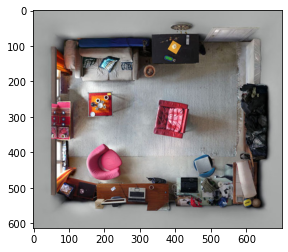

In [3]:
im = cv2.imread("perfect.jpg")
imm = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
cp = im.copy()
p_white = []
cv2.imshow("image",cp)
cv2.setMouseCallback("image",get_poly_white)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(p_white)



plt.imshow(imm)


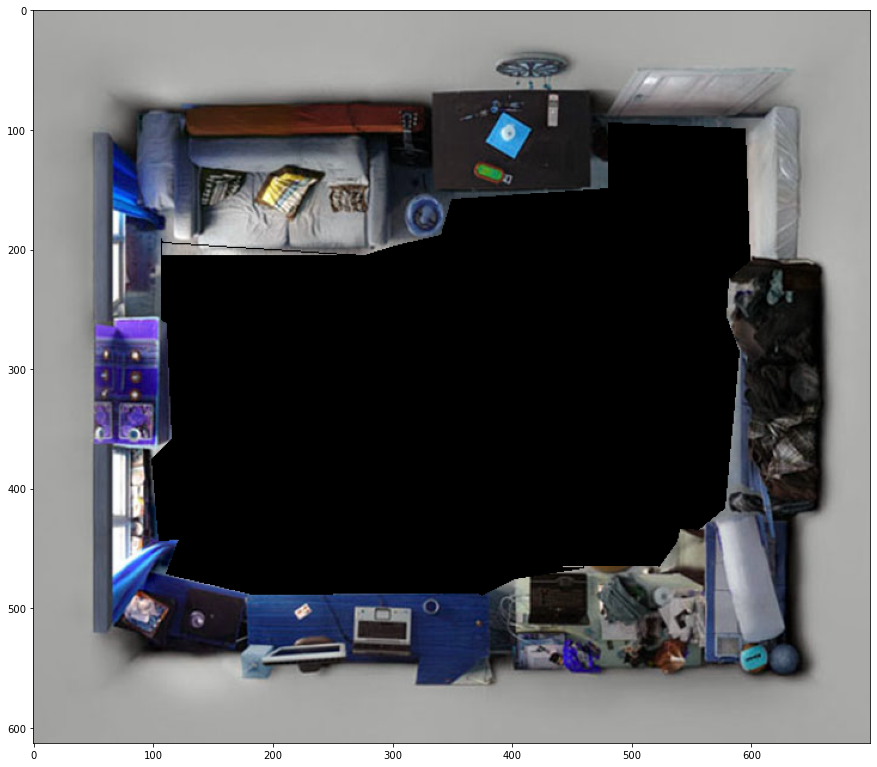

In [4]:
mask_w = np.zeros(cp.shape,dtype=np.uint8)
poly = np.int32(np.array(p_white))
cv2.fillConvexPoly(mask_w,poly,(255,255,255))
mask_w = cv2.bitwise_not(mask_w)   # invert colors with this line
other_im = im.copy()
white_mask = cv2.bitwise_and(other_im,mask_w)
plt.figure(figsize=(15,15))
plt.imshow(white_mask)
    
# cv2.imshow("hh",final_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows




In [5]:
p_black = []
main_black = []
cv2.imshow("image",cp)
cv2.setMouseCallback("image",get_poly_black)
cv2.waitKey(0)
cv2.destroyAllWindows
print(main_black)

[[150, 231], [222, 231], [225, 296], [152, 303], [151, 233]]
this ismain black [[[150, 231], [222, 231], [225, 296], [152, 303], [151, 233]]]
got it
[[354, 249], [444, 272], [426, 364], [333, 351], [357, 250]]
this ismain black [[[150, 231], [222, 231], [225, 296], [152, 303], [151, 233]], [[354, 249], [444, 272], [426, 364], [333, 351], [357, 250]]]
got it
[[128, 422], [207, 369], [276, 452], [180, 507], [130, 423]]
this ismain black [[[150, 231], [222, 231], [225, 296], [152, 303], [151, 233]], [[354, 249], [444, 272], [426, 364], [333, 351], [357, 250]], [[128, 422], [207, 369], [276, 452], [180, 507], [130, 423]]]
got it
[[[150, 231], [222, 231], [225, 296], [152, 303], [151, 233]], [[354, 249], [444, 272], [426, 364], [333, 351], [357, 250]], [[128, 422], [207, 369], [276, 452], [180, 507], [130, 423]]]


(3, 5, 2)


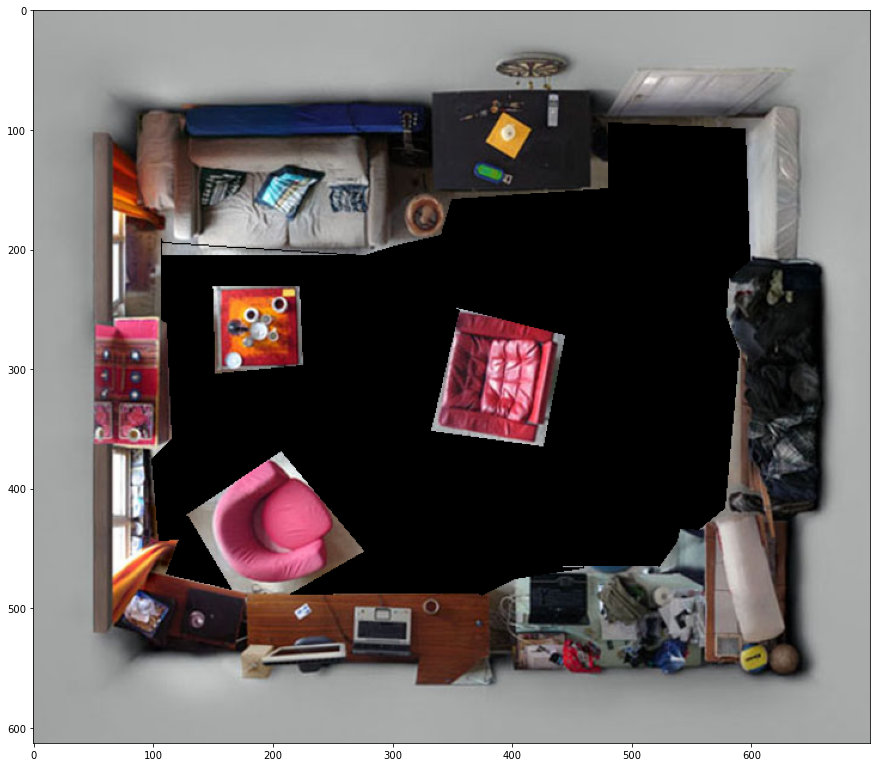

In [9]:
main_black = np.array(main_black)
mask_b = np.zeros(cp.shape,dtype=np.uint8)
print(main_black.shape)

for pts in main_black:
    poly = np.int32(np.array(pts))
    cv2.fillConvexPoly(mask_b,poly,(255,255,255))
    other_im = im.copy()
    black_mask = cv2.bitwise_and(other_im,mask_b)
    
final_mask = cv2.bitwise_or(white_mask,black_mask)
final_mask = cv2.cvtColor(final_mask,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,15))
plt.imshow(final_mask)
    
